In [1]:
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.sparse as sps
import sys
from matplotlib import pyplot as plt
sys.path.append("../../")

In [2]:
from spook import SpookPosL1, SpookPosL2, SpookL1, SpookLinSolve

Text(0, 0.5, '$\\omega$')

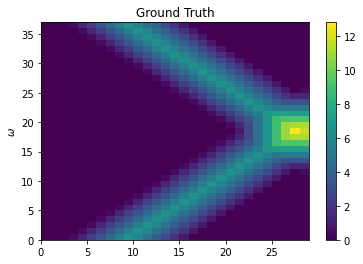

In [3]:
Na = 37
Nb = 29
Ns = 10000
Ng = 31

A = np.random.rand(Ns, Na) * 5
Xtrue = np.zeros((Na, Nb))
bb, aa = np.meshgrid(np.arange(Nb), np.arange(Na))
for p1, p2 in zip([1,-1],[1,-1]):
    tmp = 0.1*(Na+Nb) - abs((aa - Na//2) + p1* (bb - Nb//2) - p2* 0.2*(Na+Nb))
    tmp[tmp<0] = 0
    Xtrue += tmp

plt.pcolormesh(Xtrue)
plt.colorbar()
plt.title("Ground Truth")
plt.ylabel("$\omega$")

In [4]:
G = np.identity(Ng) - 0.2*np.diag(np.ones(Ng-1),k=-1) - 0.2*np.diag(np.ones(Ng-1),k=1)
G = G[:,:Nb]

B0 = A @ Xtrue
B1 = B0 @ (G.T)
B0 += 1e-3*np.linalg.norm(B0) * np.random.randn(*(B0.shape))
B1 += 1e-3*np.linalg.norm(B1) * np.random.randn(*(B1.shape))

In [21]:
SpookPosL1.verbose=True
SpookPosL2.verbose=True
SpookL1.verbose=True

## With `G=None`

Setting up the OSQP problem
Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


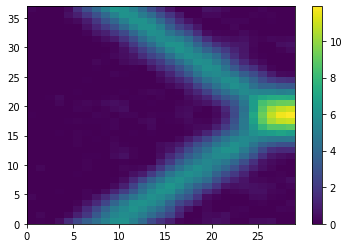

In [6]:
spk0 = SpookPosL1(B0, A, "raw", lsparse=0.1, lsmooth=(0.1,0.1))

X0 = spk0.getXopt()
plt.pcolormesh(X0)
plt.colorbar()

Sparsity hyperparam updated.
Updated
Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


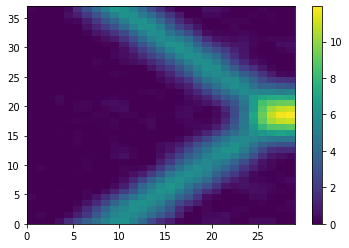

In [7]:
X0 = spk0.getXopt(lsparse=5, lsmooth=(0.1,0.1))
plt.pcolormesh(X0)
plt.colorbar()

In [8]:
AtB0, AtA = spk0._Bcontracted, spk0._AtA

spk0ctr = SpookPosL1(AtB0, AtA, "contracted", lsparse=5, lsmooth=(0.1,0.))

Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem


Resetting problem to be flattened
Setting up the OSQP problem
Updated
Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


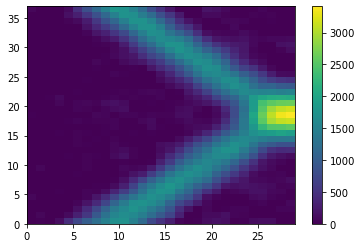

In [9]:
X0ctr = spk0ctr.getXopt(lsparse=5, lsmooth=(0.1,0.1))
plt.pcolormesh(X0ctr)
plt.colorbar()

In [10]:
AtB0, AtA = A.T @ B0, A.T @ A
spk0ctr = SpookPosL1(AtB0, AtA, "contracted", lsparse=5, lsmooth=(0.1,0.1))

Setting up the OSQP problem


Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


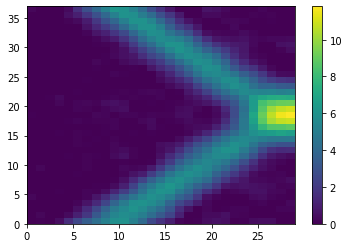

In [11]:
X0ctr = spk0ctr.getXopt(lsparse=5, lsmooth=(0.1,0.1))
plt.pcolormesh(X0ctr)
plt.colorbar()

Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Nonnegative constraints and L2 sparsity reg.
Solving Quad. Prog.


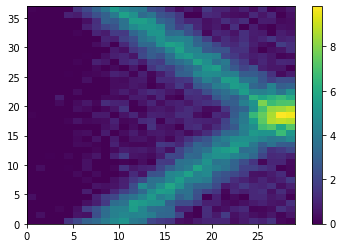

In [22]:
spk0 = SpookPosL2(B0, A, "raw", lsparse=0.1, lsmooth=(0.,0.0))

X0 = spk0.getXopt()
plt.pcolormesh(X0)
plt.colorbar()

Structure of P matrix remained the same
Updated
Nonnegative constraints and L2 sparsity reg.
Solving Quad. Prog.


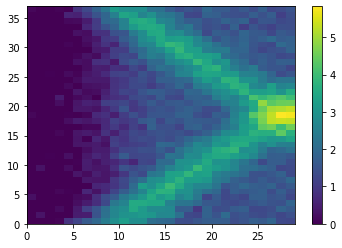

In [23]:
X0 = spk0.getXopt(lsparse=0.5, lsmooth=(0,0))
plt.pcolormesh(X0)
plt.colorbar()

Structure of P matrix remained the same
Resetting problem to be flattened
Setting up the OSQP problem
Updated
Nonnegative constraints and L2 sparsity reg.
Solving Quad. Prog.


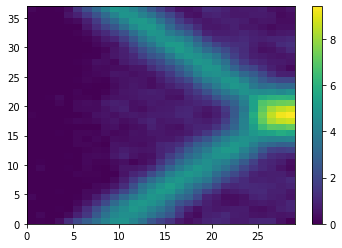

In [24]:
X0 = spk0.getXopt(lsparse=0.1, lsmooth=(0.1,0.1))
plt.pcolormesh(X0)
plt.colorbar()

Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
L1 sparsity reg. w/o nonnegative constraint
Solving Quad. Prog.


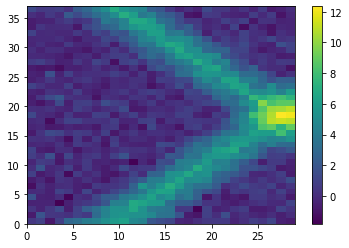

In [25]:
spk0 = SpookL1(B0, A, "raw", lsparse=0.1, lsmooth=(0.,0.0))

X0 = spk0.getXopt()
plt.pcolormesh(X0)
plt.colorbar()

Sparsity hyperparam updated.
Resetting problem to be flattened
Setting up the OSQP problem
Updated
L1 sparsity reg. w/o nonnegative constraint
Solving Quad. Prog.


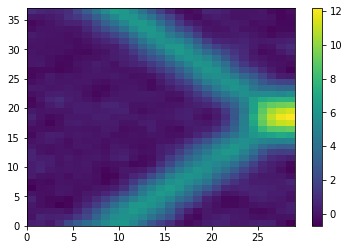

In [26]:
X0 = spk0.getXopt(lsparse=5,lsmooth=(0.1,0.1))
plt.pcolormesh(X0)
plt.colorbar()

## With non trivial G

In [29]:
spk1 = SpookPosL2(B1, A, "raw", G, lsparse=0.1, lsmooth=(0.01,0.01))

Setting up the OSQP problem


Structure of P matrix remained the same
Structure of P matrix remained the same
Updated
Nonnegative constraints and L2 sparsity reg.
Solving Quad. Prog.


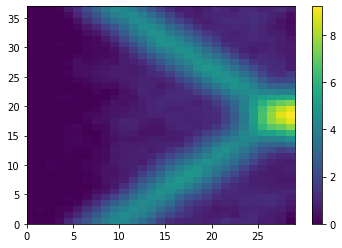

In [30]:
X1 = spk1.getXopt(lsparse=0.05, lsmooth=(0.1,0.1))
plt.pcolormesh(X1)
plt.colorbar()

In [31]:
spk1 = SpookPosL1(B1, A, "raw", G, lsparse=0.1, lsmooth=(0.01,0.01))

Setting up the OSQP problem


Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


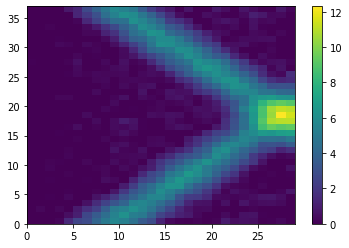

In [32]:
X1 = spk1.getXopt()
plt.pcolormesh(X1)
plt.colorbar()

In [33]:
AtB1, AtA = spk1._Bcontracted, spk1._AtA
GtG = spk1._GtG

In [34]:
spk1ctr = SpookPosL1(AtB1, AtA, "contracted", GtG, lsparse=0.1, lsmooth=(0.01,0.01))

Setting up the OSQP problem


Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


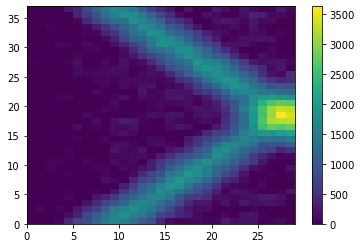

In [35]:
X1ctr = spk1ctr.getXopt()
plt.pcolormesh(X1ctr)
plt.colorbar()

In [36]:
AtB1G, AtA = A.T @ B1 @ G, A.T @ A
GtG = G.T @ G

spk1ctr = SpookPosL1(AtB1G, AtA, "contracted", GtG, lsparse=0.1, lsmooth=(0.01,0.01))

Setting up the OSQP problem


In [37]:
spk1 = SpookL1(B1, A, "raw", G, lsparse=0.1, lsmooth=(0.0,0.0))

Setting up the OSQP problem


L1 sparsity reg. w/o nonnegative constraint
Solving Quad. Prog.


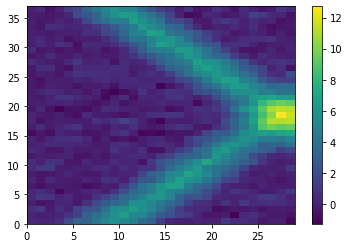

In [38]:
X1 = spk1.getXopt()
plt.pcolormesh(X1)
plt.colorbar()

Sparsity hyperparam updated.
Structure of P matrix remained the same
Updated
L1 sparsity reg. w/o nonnegative constraint
Solving Quad. Prog.


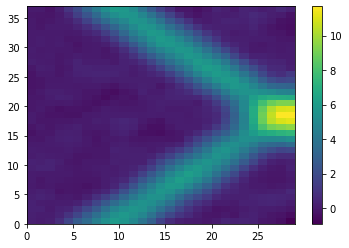

In [39]:
X1 = spk1.getXopt(lsparse=5, lsmooth=(0.1,0.1))
plt.pcolormesh(X1)
plt.colorbar()

In [40]:
spk1 = SpookLinSolve(B1, A, "raw", G, lsparse=0.1, lsmooth=(0.01,0.01))

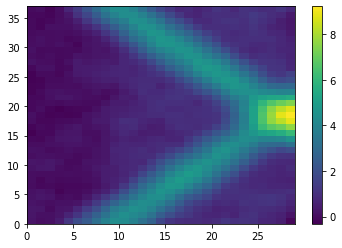

In [41]:
X1 = spk1.getXopt(lsparse=0.05, lsmooth=(0.1,0.1))
plt.pcolormesh(X1)
plt.colorbar()

In [42]:
AtB1, AtA = spk1._Bcontracted, spk1._AtA
GtG = spk1._GtG

spk1ctr = SpookLinSolve(AtB1, AtA, "contracted", GtG, lsparse=0.05, lsmooth=(0.1,0.1))

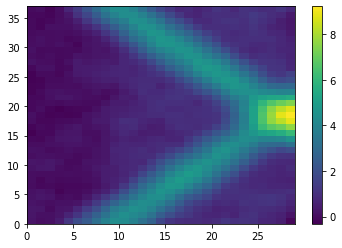

In [45]:
X1ctr = spk1ctr.getXopt()
plt.pcolormesh(X1ctr)
plt.colorbar()

In [44]:
AtB1G, AtA = A.T @ B1 @ G, A.T @ A
GtG = G.T @ G

spk1ctr = SpookLinSolve(AtB1G, AtA, "contracted", GtG, lsparse=0.05, lsmooth=(0.1,0.1))